In [9]:
from Solvers import adv_solver, span_solver, span_solver2
from Adversary import Adversary, Problem
import numpy as np
import matplotlib.pyplot as plt
import itertools
from Examples import exact_k, threshold_k
from ElementDistinctness import ED
from copy import deepcopy as copy
import scipy

In [10]:
class SpanProgram():
    def __init__(self, problem, I_dict):
        self.target = np.ones(problem.no_len)
        self.num_vects = np.sum([len(v) for i, v in I_dict.items()])
        self.ordered_I = [pair for pair in itertools.product(tuple(range(problem.n)), problem.alphabet)]
        self.I_to_mat = {}
        self.counter = 0
        self.vect_list = []
        self.ticks = []
        for pair, v_set in I_dict.items():
            self.ticks.append(self.counter)
            self.I_to_mat[pair] = list(range(self.counter, self.counter + len(v_set)))
            self.counter += len(v_set)
            self.vect_list.append(*v_set)
        
        self.A = np.block(self.vect_list).T 
    
    def get_activated_A(self, x):
        activated_A = np.zeros(self.A.shape)
        for i in range(len(x)):
            interval = self.I_to_mat[(i, x[i])]
            activated_A[:, interval] = self.A[:, interval]
        return activated_A
        
        
    def apply(x, witness):
        return get_activated_A(x) @ witness
    
    def visualize_A(self):
        plt.imshow(self.A)
        plt.xticks(self.ticks, self.ordered_I)
        plt.colorbar()
        plt.show()
            
        

In [ ]:
prob = ED(4)
v, X = span_solver(prob)
X2 = np.round(X, 6)

[(0, 1, 2, 3), (0, 1, 3, 2), (0, 2, 1, 3), (0, 2, 3, 1), (0, 3, 1, 2), (0, 3, 2, 1), (1, 0, 2, 3), (1, 0, 3, 2), (1, 2, 0, 3), (1, 2, 3, 0), (1, 3, 0, 2), (1, 3, 2, 0), (2, 0, 1, 3), (2, 0, 3, 1), (2, 1, 0, 3), (2, 1, 3, 0), (2, 3, 0, 1), (2, 3, 1, 0), (3, 0, 1, 2), (3, 0, 2, 1), (3, 1, 0, 2), (3, 1, 2, 0), (3, 2, 0, 1), (3, 2, 1, 0)]
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Jul 06 03:56:43 PM: Your problem has 451585 variables, 3625 constraints, and 0 parameters.
(CVXPY) Jul 06 03:56:43 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jul 06 03:56:43 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Jul 06 03:56:43 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
------------------------------------------------------------

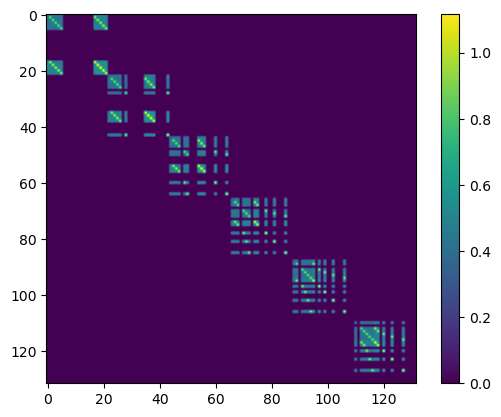

In [7]:
plt.imshow(X)
plt.colorbar()

In [8]:
print(np.linalg.matrix_rank(X2))
print(np.trace(X2))

66
62.57968199999999


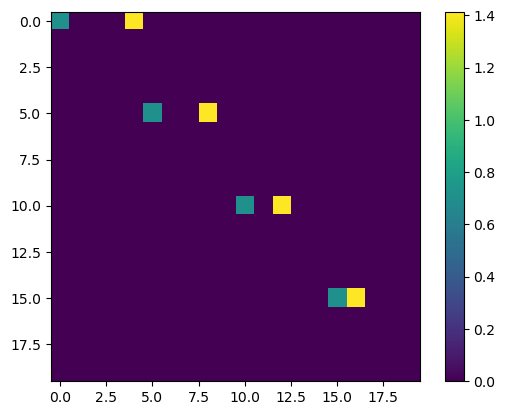

In [114]:
plt.imshow(L)
plt.colorbar()